In [118]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
PATH = f"./data/사용자수_2021년 1월-10월.csv"
df = pd.read_csv(PATH)
df

,date_id,활성사용자수,활성사용자수(웰컴 및 Event 수신제외),신규사용자수,재방문사용자수,누적사용자수
0,2021-01-01,1,1,0,1,1331
1,2021-01-02,1,1,0,1,1331
2,2021-01-03,4,4,1,3,1332
3,2021-01-04,49,49,0,49,1332
4,2021-01-05,54,54,2,52,1334
...,...,...,...,...,...,...
292,2021-10-26,302,302,6,296,2804
293,2021-10-27,264,263,6,258,2810
294,2021-10-28,262,262,4,258,2814
295,2021-10-29,195,195,2,193,2816


array([[<AxesSubplot:title={'center':'활성사용자수'}>,
        <AxesSubplot:title={'center':'활성사용자수(웰컴 및 Event 수신제외)'}>],
       [<AxesSubplot:title={'center':'신규사용자수'}>,
        <AxesSubplot:title={'center':'재방문사용자수'}>],
       [<AxesSubplot:title={'center':'누적사용자수'}>, <AxesSubplot:>]],
      dtype=object)

C:\Users\jh01l\Desktop\KPU\2학년\파이썬\integrated_venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jh01l\Desktop\KPU\2학년\파이썬\integrated_venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jh01l\Desktop\KPU\2학년\파이썬\integrated_venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jh01l\Desktop\KPU\2학년\파이썬\integrated_venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jh01l\Desktop\KPU\2학년\파이썬\integrated_venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=fl

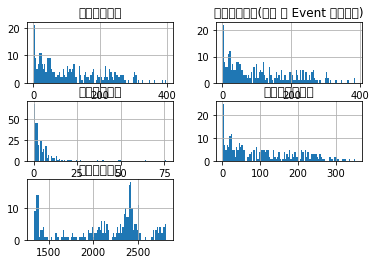

In [119]:
df.hist(bins=100)

In [120]:
users = df.loc[:, ["date_id","활성사용자수"]]
users

,date_id,활성사용자수
0,2021-01-01,1
1,2021-01-02,1
2,2021-01-03,4
3,2021-01-04,49
4,2021-01-05,54
...,...,...
292,2021-10-26,302
293,2021-10-27,264
294,2021-10-28,262
295,2021-10-29,195


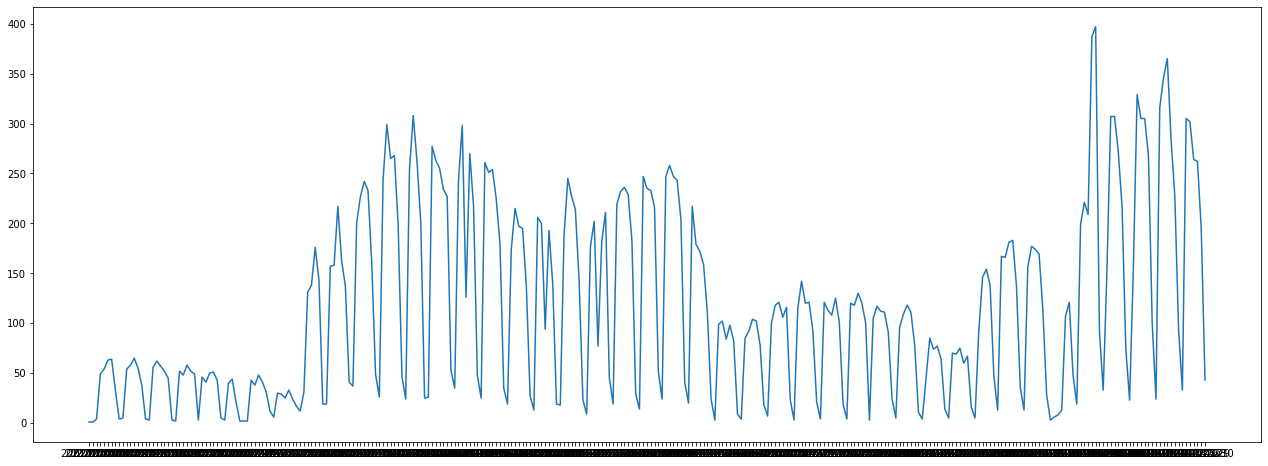

In [121]:
plt.figure(figsize=(22,8))
plt.plot(users["date_id"], users["활성사용자수"]) # 주말 데이터 제거 전 (결측값 존재)

In [122]:
import datetime
def get_days(date): # 요일 구하는 함수
    date = list(map(int, date.split('-')))
    days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
    return days[datetime.date(date[0], date[1], date[2]).weekday()]

In [123]:
for idx, i in enumerate(users['date_id']):
    if get_days(i) in ["토요일", "일요일"]:
        users = users.drop(index=idx, axis=0)

print(users)    # 결측값 제거

        date_id  활성사용자수
0    2021-01-01       1
3    2021-01-04      49
4    2021-01-05      54
5    2021-01-06      63
6    2021-01-07      64
..          ...     ...
291  2021-10-25     305
292  2021-10-26     302
293  2021-10-27     264
294  2021-10-28     262
295  2021-10-29     195

[213 rows x 2 columns]


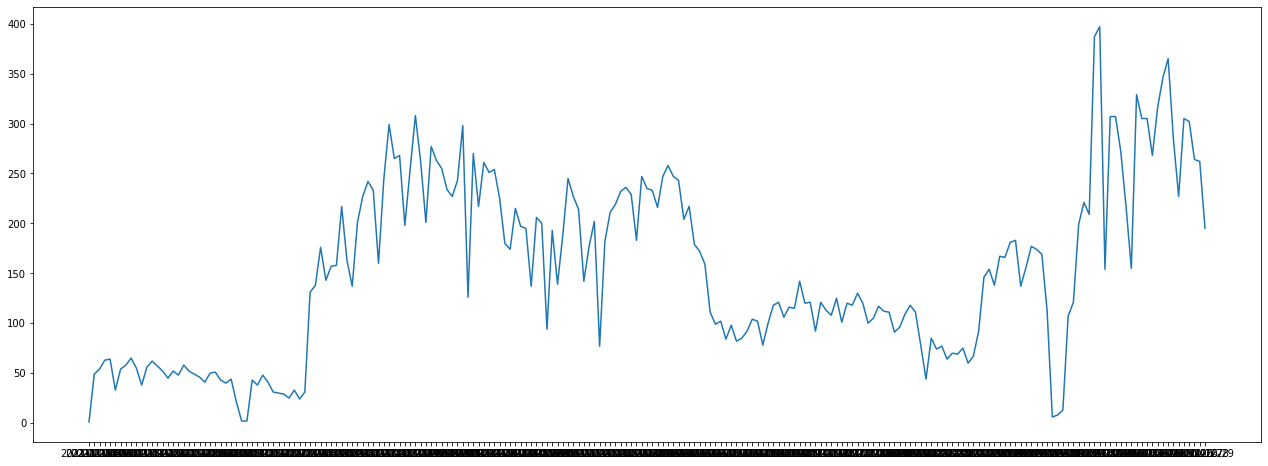

In [124]:
plt.figure(figsize=(22,8))
plt.plot(users['date_id'], users['활성사용자수'])

# 시계열 분해법
## 정의
* 시계열 데이터를 추세/순환/계절/불규칙 요소로 분해하는 기법이다

## 용어
#### 추세
* 데이터가 장기적으로 증가하거나 감소하는것이며 비선형적일 수 있음

#### 순환
* 경기변동과 같이 정치, 경제, 사회적 요인에 의한 변화로, 일정주기가 없으며 장기적인 변화현상이다.

#### 계절성
* 주, 월, 분기, 반기 단위 등 특정 시간의 주기로 나타나는 패턴이다.

#### 불규칙 요소
* 설명될 수 없는 요인 또는 돌발적인 요인에 의하여 일어나는 변화로, 예측 불가능한 임의의 변동을 의미한다.
* 분해법에서는 추세, 훈환 계절성을 뺀 나머지 요소

In [125]:
timeSeries = users.loc[:, ["date_id", "활성사용자수"]]
timeSeries.index = timeSeries.date_id
ts = timeSeries.drop("date_id", axis=1)
ts.rename(columns= {"활성사용자수" : "users"}, inplace= True)
ts.sort_index(inplace=True)

statsmodels.tsa.seasonal.DecomposeResult

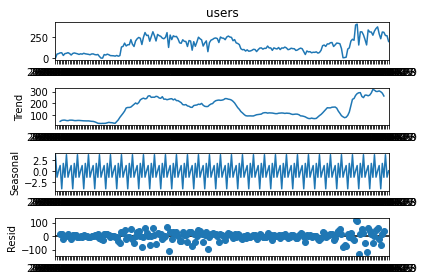

In [126]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts['users'], model='additive', period=7)
result.plot()
type(result)

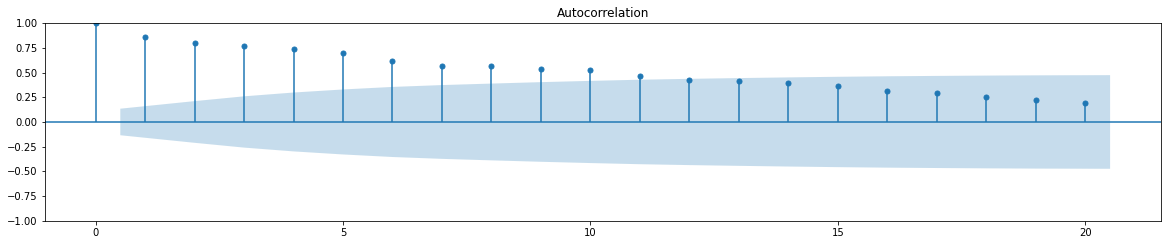

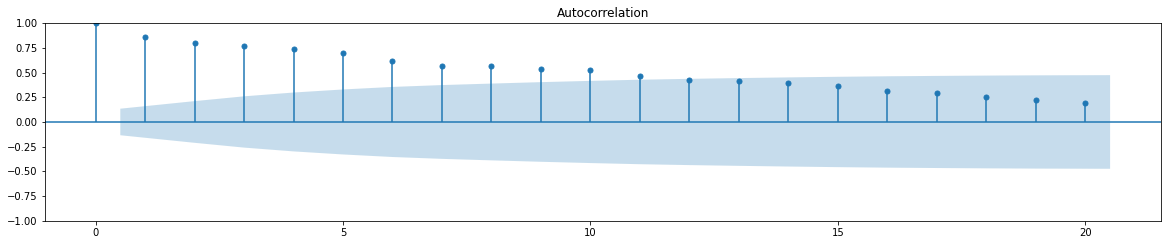

In [127]:
import statsmodels.api as sm
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts, lags=20, ax=ax1)
fig # 정상성 만족?

In [128]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))  # 정상성 만족 x

ADF Statistic: -1.821836
p-value: 0.369676
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574


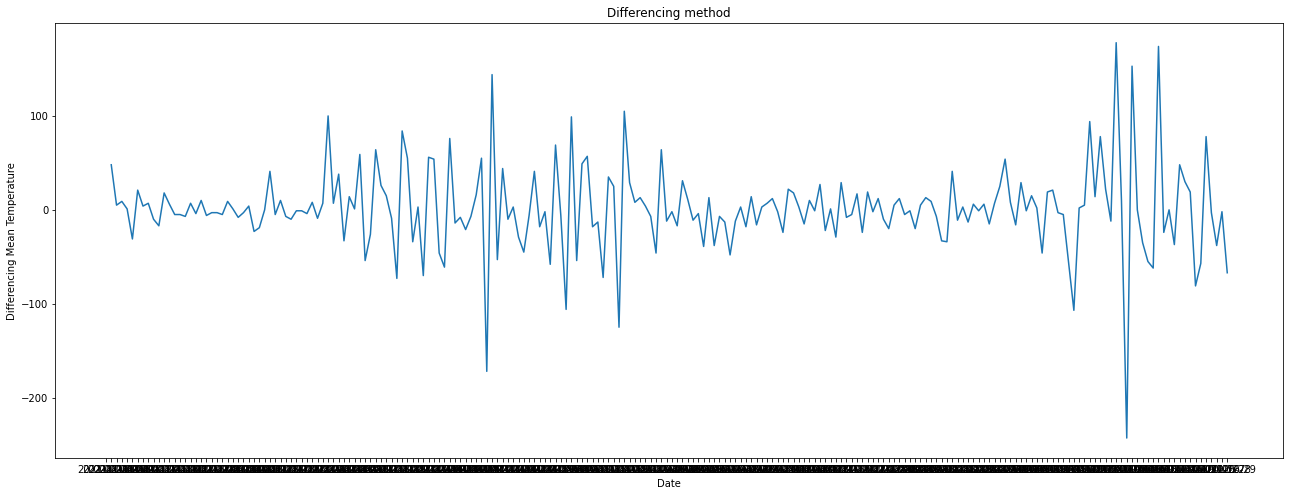

In [129]:
ts_diff = ts - ts.shift()
plt.figure(figsize=(22,8))
plt.plot(ts_diff)
plt.title("Differencing method")
plt.xlabel("Date")
plt.ylabel("Differencing Mean Temperature")
plt.show()  # 1차 차분

In [130]:
result = adfuller(ts_diff[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))  # 정상성 만족 o

ADF Statistic: -5.349224
p-value: 0.000004
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574


C:\Users\jh01l\Desktop\KPU\2학년\파이썬\integrated_venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


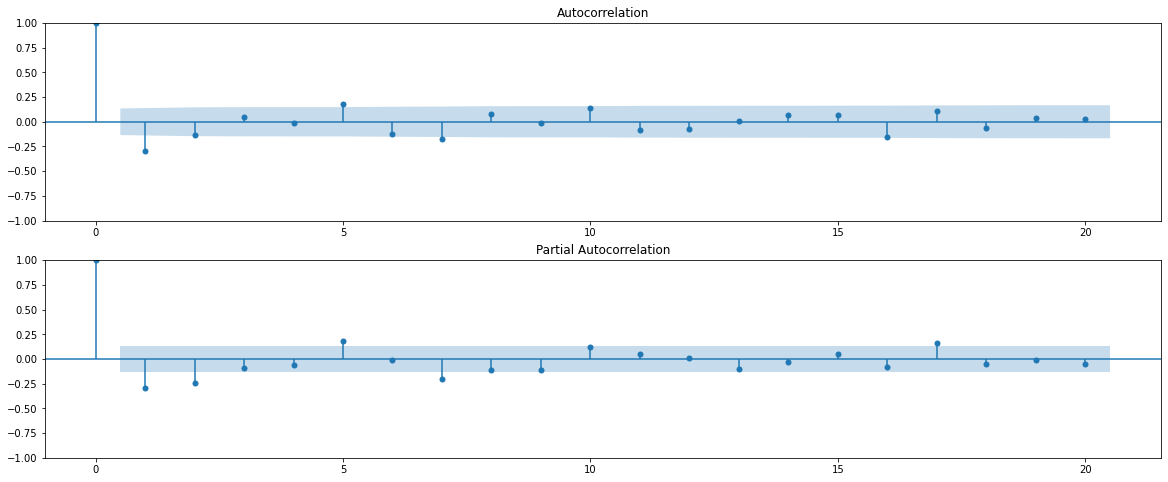

In [131]:
import statsmodels.api as sm

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_diff[1:], lags=20, ax=ax1) #
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_diff[1:], lags=20, ax=ax2)# , lags=40

# ACF와 PACF 그래프를 그려 ARIMA 모형의 p와 q를 결정

C:\Users\jh01l\AppData\Local\Temp/ipykernel_14408/2051830744.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
C:\Users\jh01l\Desktop\KPU\2학년\파이썬\integrated_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\jh01l\Desktop\KPU\2학년\파이썬\integrated_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\jh01l\Desktop\KPU\2학년\파이썬\integrated_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index h

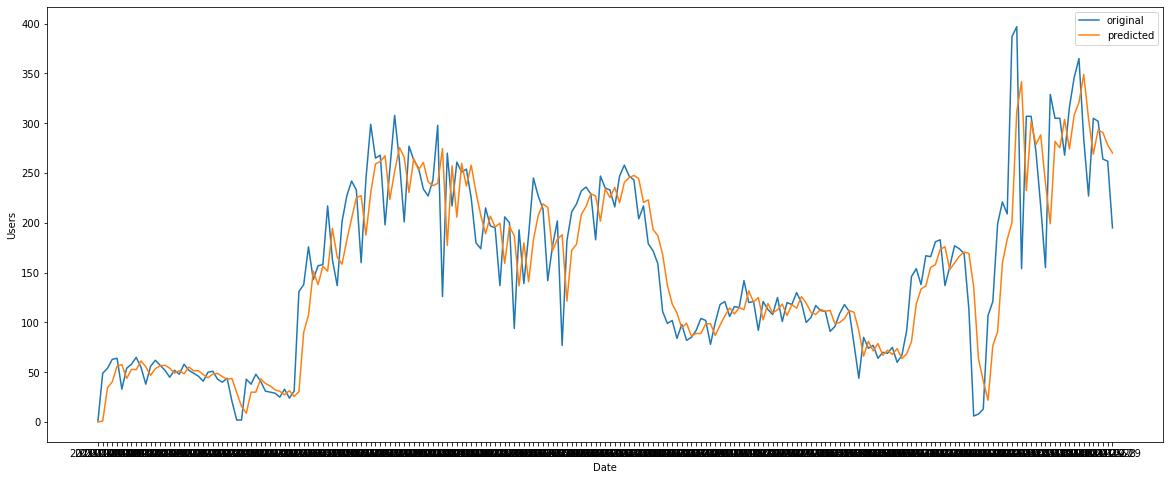

In [132]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import datetime

# fit model
model = ARIMA(ts, order=(2,1,2))
model_fit = model.fit()
forecast = model_fit.predict(type='levels')
plt.figure(figsize=(20,8))
plt.xlabel("Date")
plt.ylabel("Users")
plt.plot(ts, label = "original")
plt.plot(forecast, label="predicted")
plt.legend()

In [133]:
pd.DataFrame(forecast)  # 여기까지 과거 데이터 모델에 fitting

,predicted_mean
date_id,
2021-01-01,0.000000
2021-01-04,0.999350
2021-01-05,34.432669
2021-01-06,40.374393
2021-01-07,56.071252
...,...
2021-10-25,268.997994
2021-10-26,293.337916
2021-10-27,290.653263
